<a href="https://colab.research.google.com/github/maggieliuzzi/reinforcement_learning/blob/master/explore_exploit_dilemma/BayesianBandits_Gaussian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Thompson Sampling / Bayesian Bandits** - with Gaussian distribution

In [0]:
from __future__ import print_function, division  # sudo pip install -U future
from builtins import range
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm  # Normal/ Gaussian distribution

In [0]:
np.random.seed(1)
NUM_TRIALS = 2000
BANDIT_MEANS = [1, 2, 3]

In [0]:
class Bandit:
  def __init__(self, true_mean):
    self.true_mean = true_mean
    # parameters for mu - prior is N(0,1) (standard normal)
    self.m = 0  # predicted mean of mean of x
    self.lambda_ = 1
    self.sum_x = 0 # sum of all samples collected  # for convenience
    self.tau = 1
    self.N = 0
    # tau = 1 / variance, variance = sigma^2

  def pull(self):
    return np.random.randn() / np.sqrt(self.tau) + self.true_mean  # draws sample from Gaussian: N(true_mean, 1/tau)  # precision: tau

  def sample(self):
    return np.random.randn() / np.sqrt(self.lambda_) + self.m  # posterior also Gaussian N(predicted_mean, 1/lambda) # precision: lambda

  def update(self, x):
    self.lambda_ += self.tau
    self.sum_x += x
    self.m = self.tau*self.sum_x / self.lambda_
    self.N += 1

In [0]:
def plot(bandits, trial):
  x = np.linspace(-3, 6, 200)
  for b in bandits:
    y = norm.pdf(x, b.m, np.sqrt(1. / b.lambda_))
    plt.plot(x, y, label=f"real mean: {b.true_mean:.4f}, num plays: {b.N}")
  plt.title(f"Bandit distributions after {trial} trials")
  plt.legend()
  plt.show()

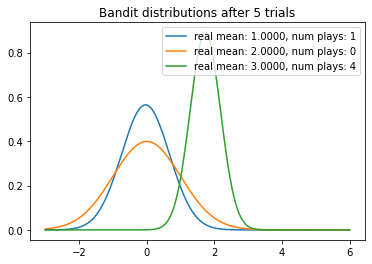

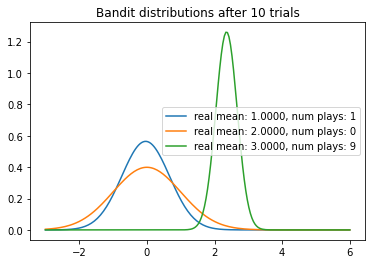

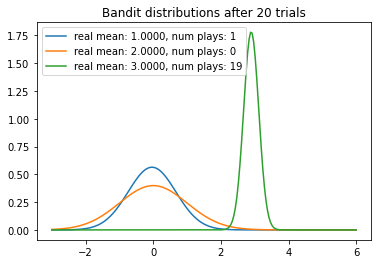

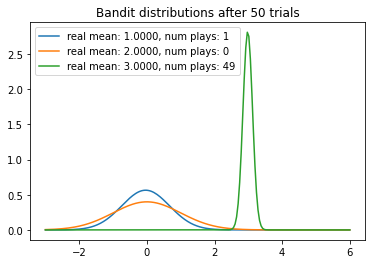

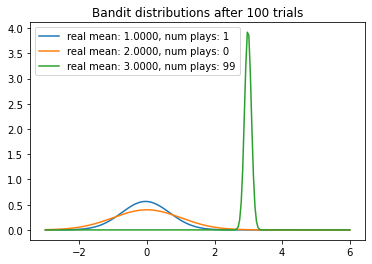

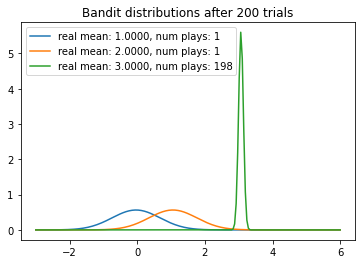

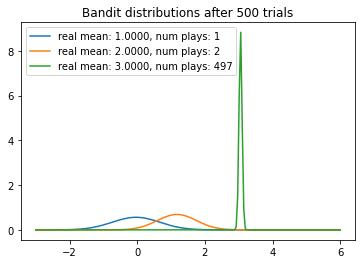

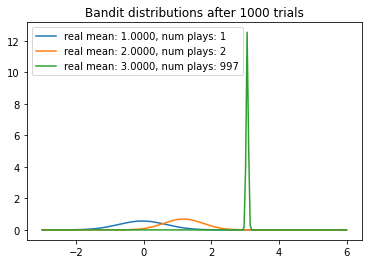

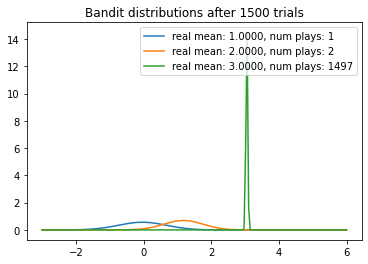

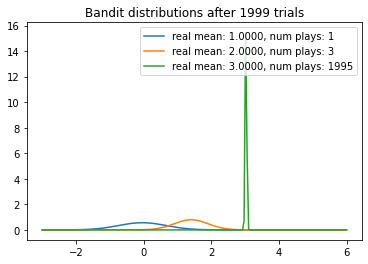

In [11]:
bandits = [Bandit(m) for m in BANDIT_MEANS]

sample_points = [5,10,20,50,100,200,500,1000,1500,1999]
rewards = np.empty(NUM_TRIALS)
for i in range(NUM_TRIALS):
  # Thompson sampling
  j = np.argmax([b.sample() for b in bandits])

  # plot the posteriors
  if i in sample_points:
    plot(bandits, i)

  # pull the arm for the bandit with the largest sample
  x = bandits[j].pull()

  # update the distribution for the bandit whose arm we just pulled
  bandits[j].update(x)

  # update rewards
  rewards[i] = x

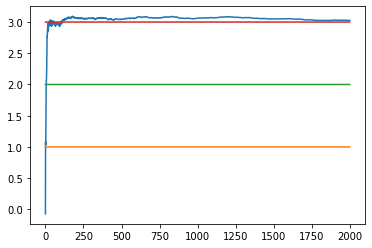

In [13]:
cumulative_average = np.cumsum(rewards) / (np.arange(NUM_TRIALS) + 1)

# Cumulative average reward
# plot moving average ctr
plt.plot(cumulative_average)
for m in BANDIT_MEANS:
  plt.plot(np.ones(NUM_TRIALS)*m)
plt.show()